In [1]:
#Import Relevant Libraries
import numpy as np
import pandas as pd
#from google.colab import files
import io

In [3]:
# Load your training data set
df_train = pd.read_csv('CreditDefault_training.csv')

In [4]:
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,50000,2,2,2,24,-1,-1,-1,-1,0,...,6561,5091,353,1572,1572,6561,102,353,27000,0
1,70000,2,2,2,24,0,0,0,0,0,...,64733,66680,71243,3000,3000,2500,3000,5800,0,0
2,420000,1,1,1,43,-2,-2,-2,-2,-2,...,2846,3027,5946,14274,8232,2853,3027,5946,32053,0
3,30000,1,2,3,53,1,-2,-1,2,0,...,3825,3825,0,0,4070,0,0,0,0,1
4,50000,2,2,1,49,1,2,2,2,0,...,21951,22287,22778,1000,3321,0,1000,1000,1001,0


In [5]:
# Split training data into X and y
X=df_train.drop(['default.payment.next.month'],axis=1)
y=df_train['default.payment.next.month']

Standardization and one-hot encoding for training set and test set

In [6]:
# Load test data set
df_test = pd.read_csv('CreditDefault_Xtest.csv')

In [7]:
#standardization and one-hot encoding 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cat_col=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for i in X.columns:
  if(i not in cat_col):
    X[i]=scaler.fit_transform(X[[i]]).ravel()
    df_test[i]=scaler.transform(df_test[[i]]).ravel()

X=pd.get_dummies(X,columns=cat_col)

df_test=pd.get_dummies(df_test,columns=cat_col)
df_test = df_test.reindex(columns = X.columns, fill_value=0)

**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)

(2789, 82)
(2789,)
(1196, 82)


## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels

### WRITE CODE HERE ###
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\karth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)
### WRITE CODE HERE ###
lr=LogisticRegression(max_iter=200,random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=42)

In [13]:
# predict the output for validation dataset
### WRITE CODE HERE
pred_val=lr.predict(X_val)
print(pred_val)

[0 0 1 ... 0 0 0]


In [14]:
def my_precision(y, y_preds): #TP/(TP+FP)
    tp=sum(np.bitwise_and(y==1,y_preds==1))
    fp=sum(np.bitwise_and(y==0,y_preds==1))
    return tp/(tp+fp)

def my_recall(y, y_preds): #TP/(TP+FN)
    tp=sum(np.bitwise_and(y==1,y_preds==1))
    fn=sum(np.bitwise_and(y==1,y_preds==0))
    return tp/(tp+fn)


def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
    tp=sum(np.bitwise_and(y==1,y_preds==1))
    tn=sum(np.bitwise_and(y==0,y_preds==0))
    fp=sum(np.bitwise_and(y==0,y_preds==1))
    fn=sum(np.bitwise_and(y==1,y_preds==0))
    return (tp+tn)/(tp+fp+fn+tn)

In [15]:
print('Precision is',my_precision(y_val,pred_val))
print('Recall is',my_recall(y_val,pred_val))
print('Accuracy is',my_accuracy(y_val,pred_val))

Precision is 0.6610169491525424
Recall is 0.43333333333333335
Accuracy is 0.8219063545150501


Q. Accuracy<br>
Ans - 0.82

Q. Precision<br>
Ans - 0.66

Q. Recall<br>
Ans - 0.43

In this case, we would like to use recall as from the company's perspective, it is more important to predict the default and capture the potential defaults from the model to reduce the risk of default in the future. However, the other two metrics are also relevant.

### ROC curve

AUC: 0.767


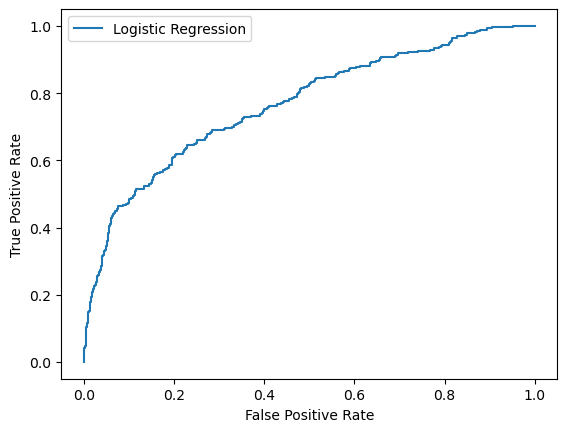

In [16]:
# Plot the ROC curve by giving appropriate names for title and axes. 
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn.metrics as metrics

pred_val_prob=lr.predict_proba(X_val)
fpr, tpr, _ = roc_curve(y_val, pred_val_prob[:,1])
auc = roc_auc_score(y_val, pred_val_prob[:,1])
print('AUC: %.3f' % auc)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Q. What is the AUC obtained?<br>
Ans - 0.767

## Hyperparameter Tuning

In [17]:
lr_a=LogisticRegression(penalty='l1',C=0.1,solver='liblinear')
lr_a.fit(X_train,y_train)
pred_val_a=lr_a.predict(X_val)
print('Precision is', my_precision(y_val,pred_val_a))
print('Recall is', my_recall(y_val,pred_val_a))
print('Accuracy is',my_accuracy(y_val,pred_val_a))


Precision is 0.6804733727810651
Recall is 0.42592592592592593
Accuracy is 0.8252508361204013


In [18]:
lr_b=LogisticRegression(penalty='l1',C=0.5,solver='liblinear')
lr_b.fit(X_train,y_train)
pred_val_b=lr_b.predict(X_val)
print('Precision is', my_precision(y_val,pred_val_b))
print('Recall is',my_recall(y_val,pred_val_b))
print('Accuracy is',my_accuracy(y_val,pred_val_b))


Precision is 0.6685714285714286
Recall is 0.43333333333333335
Accuracy is 0.8235785953177257


In [19]:
lr_c=LogisticRegression(penalty='l2',C=0.1)
lr_c.fit(X_train,y_train)
pred_val_c=lr_c.predict(X_val)
print('Precision is',my_precision(y_val,pred_val_c))
print('Recall is',my_recall(y_val,pred_val_c))
print('Accuracy is',my_accuracy(y_val,pred_val_c))


Precision is 0.6627906976744186
Recall is 0.4222222222222222
Accuracy is 0.8210702341137124


In [20]:
lr_d=LogisticRegression(penalty='l2',C=0.5)
lr_d.fit(X_train,y_train)
pred_val_d=lr_d.predict(X_val)
print('Precision is',my_precision(y_val,pred_val_d))
print('Recall is', my_recall(y_val,pred_val_d))
print('Accuracy is',my_accuracy(y_val,pred_val_d))


Precision is 0.6647727272727273
Recall is 0.43333333333333335
Accuracy is 0.822742474916388


C:\Users\karth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


__Best Model__

lr_b with C=0.5 and L1 as it has the highest recall and accuracy.

In [21]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty) ###
lr_final=LogisticRegression(penalty='l1',C=0.5,solver='liblinear')
lr_final.fit(X_train,y_train)
# return the prediction as "y_pred"
y_pred=lr_final.predict(df_test)